# Homework 1: Gradient Descent & Friends

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1 (Pre-processing)

### (a) Remove any rows of the data that contain a missing (‘NA’) value. List the indices of the removed data points. Then, delete all features from the dataset apart from: age, nearestMRT and nConvenience.

In [2]:
df = pd.read_csv("./real_estate.csv")
df.dropna(axis=0, inplace=True)
df.drop(columns=['transactiondate', 'latitude', 'longitude', 'price'], inplace=True)


### (b) normalisation and provide the mean value over your dataset

In [4]:
def pre_processing(x):
    x_max = x.max()
    x_min = x.min()
    for i in range(x.size):
        temp = (x[i] - x_min) / (x_max - x_min)
        x[i] = temp
    return x

x_new_age = pre_processing(np.array(df['age']))
x_new_mrt = pre_processing(np.array(df['nearestMRT']))
x_new_nCon = pre_processing(np.array(df['nConvenience']))

x_new_age_mean = x_new_age.mean()
x_new_mrt_mean = x_new_mrt.mean()
x_new_nCon_mean = x_new_nCon.mean()

## Question 2 (Train and Test sets)

### ﬁrst half of observations to create trainning set, remaining half for test set

In [5]:
size = df.index.size
training_set = df[:int(size / 2)]
test_set = df[int(size / 2):]

### Print out the ﬁrst and last rows of both your training and test sets

In [6]:
first_training_row = training_set.loc[0]
last_training_row = training_set.iloc[-1]
first_test_row = test_set.iloc[0]
last_test_row = test_set.iloc[-1]

## Question 3(Loss Function)

![]()

## Question 4 (Gradient Descent Psuedocode)

### gradient descent updates

![]()

### stochastic gradient descent updates

![]()

## Question 5 (Gradient Descent Implementation)

### (a) Generate a 3×3 grid of plots showing performance for each step-size.

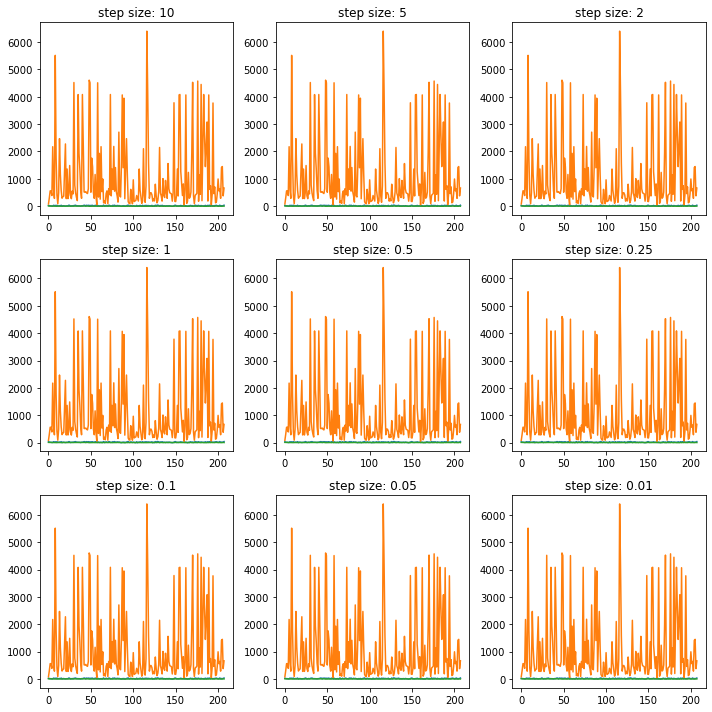

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
nIter = 400
alphas = [10, 5, 2, 1, 0.5, 0.25, 0.1, 0.05, 0.01]
for i, ax in enumerate(ax.flat):
    ax.plot(training_set)
    ax.set_title(f"step size: {alphas[i]}")

plt.tight_layout()
plt.show()

### (b) choose an appropriate step size (and state your choice), and explain why you made this choice.